# Dimensionlaity Reduction Using PCA

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns

# Load dataset

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Original data - Exploratory Data Analysis 

In [3]:
feature_names = X.columns.tolist()  # Use the DataFrame's columns
print("Original Data Shape:", X.shape)
print("Original Features:", feature_names)
print("Original Features Length:", len(feature_names))

Original Data Shape: (569, 30)
Original Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Original Features Length: 30


In [4]:
print(f"Dataset shape: {X.shape}")
print(f"Target distribution:\n{pd.Series(y).value_counts()}")
print(f"Feature correlation matrix:\n{X.corr()}")

Dataset shape: (569, 30)
Target distribution:
1    357
0    212
Name: count, dtype: int64
Feature correlation matrix:
                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.2

The Breast Cancer dataset consists of 569 samples and 30 numerical features derived from cell nuclei measurements. It is ideal for dimensionality reduction due to the high correlation among features, indicating redundancy and overlapping information. Techniques like PCA can efficiently capture the essential variance while simplifying the dataset for analysis.

# Standardize the data

In [5]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Correlation Heatmap Before PCA

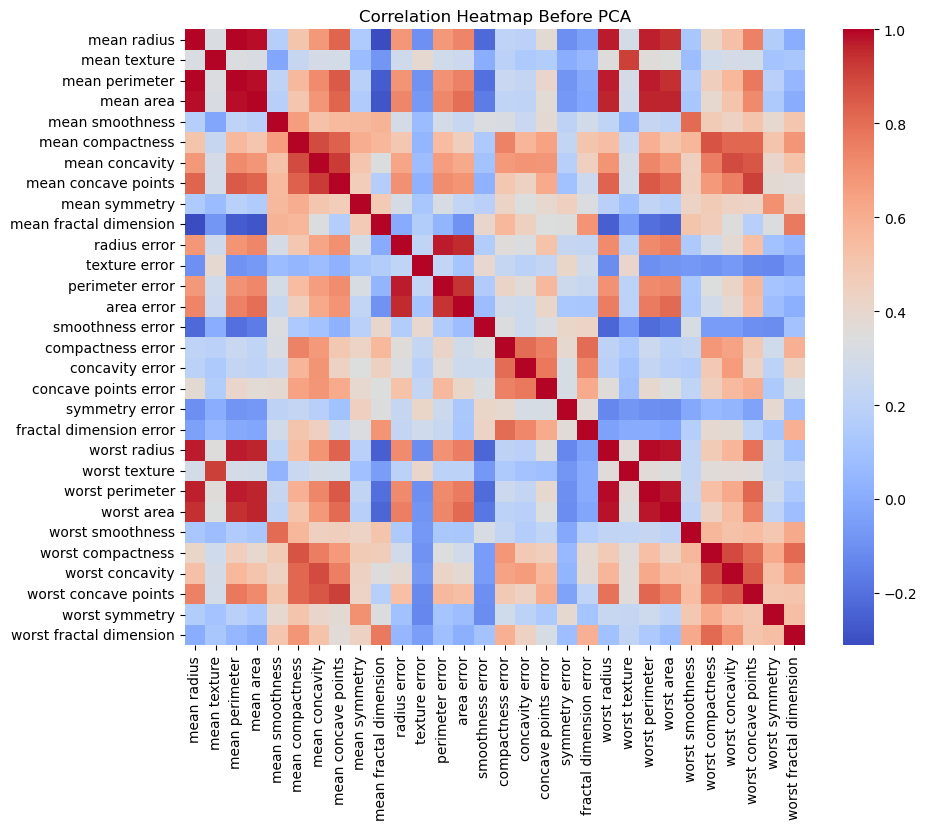

In [6]:
# Heatmap - Correlation between features on original data before PCA
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_normalized, columns=data.feature_names).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap Before PCA')
plt.show()

The correlation heatmap shows the relationships between the features in the dataset. Strong positive correlations are indicated by red, while strong negative correlations are shown in blue. The presence of highly correlated feature groups suggests redundancy in the data, making it suitable for dimensionality reduction.

# Classification Accuracy Without PCA

In [7]:
# Classification Accuracy Without PCA
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
accuracy_without_pca = accuracy_score(y_test, clf.predict(X_test))
print(f'Accuracy without PCA: {accuracy_without_pca:.4f}')

Accuracy without PCA: 0.9737


The logistic regression model achieved 97.37% accuracy without PCA, indicating strong performance on the full dataset with all features.

# Apply PCA and Find optimal number of components

In [8]:
# PCA: Find optimal number of components for 95% variance
pca = PCA()
pca.fit(X_normalized)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Number of components for 95% variance: {optimal_components}")

Number of components for 95% variance: 10


PCA analysis revealed that the optimal number of components to retain at least 95% of the variance in the dataset is 10, effectively reducing the feature space from 30 to 10 while preserving most of the data's essential information.

# Plotting PCA Explained Variance

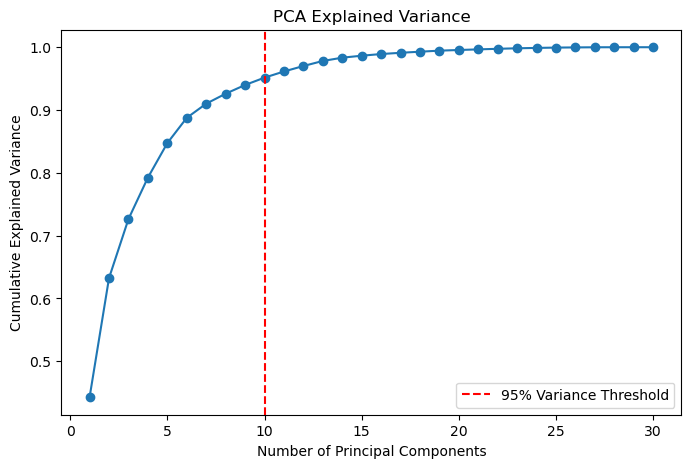

In [9]:
# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.axvline(optimal_components, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.legend()
plt.show()


The graph shows the cumulative explained variance as a function of the number of principal components in PCA. The curve rises steeply initially, indicating that the first few components capture most of the variance. The red dashed line marks the point where 95% of the variance is retained, which corresponds to 10 principal components.

# Truncate small singular values and Project the data onto the subspace defined by the top k principal components

In [10]:
#PCA with optimal components
pca_optimal = PCA(n_components=optimal_components)
X_pca = pca_optimal.fit_transform(X_normalized)

X_pca is the transformed dataset obtained by reducing the original features to 10 principal components,significantly simplifying the feature space.

# PCA Results

In [11]:
# PCA Results
pca_feature_names = [f'Principal Component {i+1}' for i in range(optimal_components)]
print("Data Shape After PCA:", X_pca.shape)
print("PCA Features:", pca_feature_names)
print("PCA Features Length:", len(pca_feature_names))

Data Shape After PCA: (569, 10)
PCA Features: ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10']
PCA Features Length: 10


After applying PCA, the dataset is reduced to 10 principal components with a shape of (569, 10), retaining the most critical variance from the original 30 features.

# Scree Plot

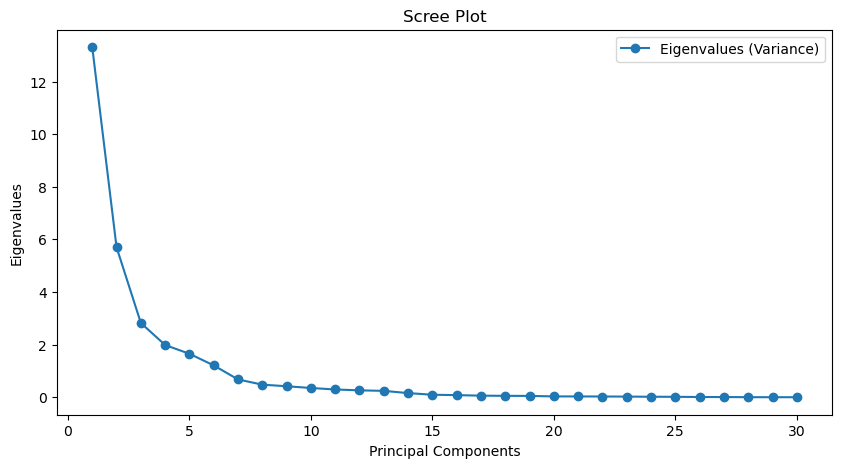

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o', label='Eigenvalues (Variance)')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.legend()
plt.show()

The scree plot shows that most variance is captured by the first few components, with diminishing returns after 10 components, justifying dimensionality reduction.

# Explained and Cumulative Variance

In [13]:
explained_variance_ratio = pca_optimal.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
print(explained_variance_ratio)
print(cumulative_variance)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881]


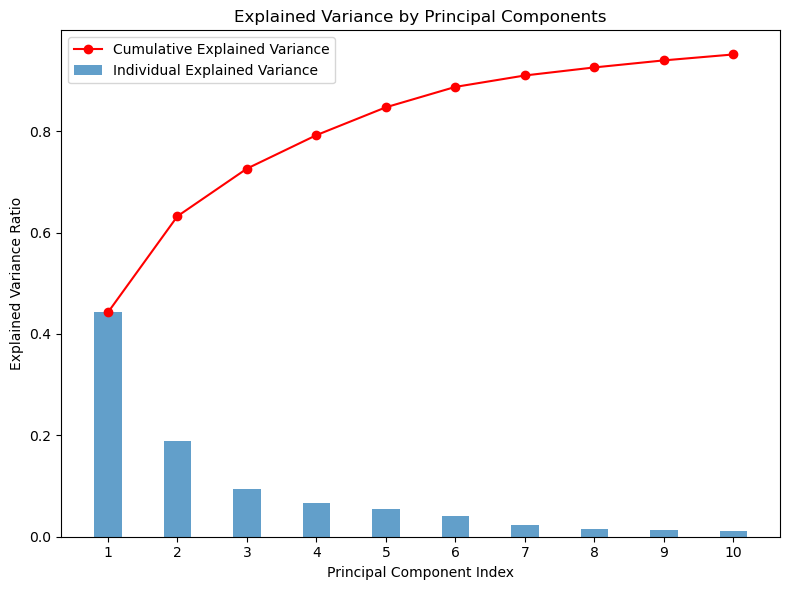

In [14]:
# Plot Explained Variance and Cumulative Variance
plt.figure(figsize=(8, 6))

# Individual Explained Variance (bar chart)
plt.bar(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    alpha=0.7,
    width=0.4,
    label='Individual Explained Variance'
)

# Cumulative Explained Variance (line plot)
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker='o',
    color='red',
    label='Cumulative Explained Variance'
)

# Improved x-axis with integer labels
plt.xticks(range(1, len(explained_variance_ratio) + 1))

# Labels and Title
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')

# Display the plot
plt.tight_layout()
plt.show()


The first 10 principal components capture 95.16% of the total variance, with the first contributing 44.27% and each subsequent component adding decreasing amounts, demonstrating effective dimensionality reduction.

The plot displays the individual and cumulative explained variance ratios for the first 10 principal components after applying PCA.

The blue bars represent the individual explained variance ratio for each principal component. The first component explains 44.27% of the variance, and the second adds another 18.97%, with diminishing contributions from subsequent components.

The red line shows the cumulative explained variance, reaching 95.16% after 10 components.

# Correlation Heatmap After PCA

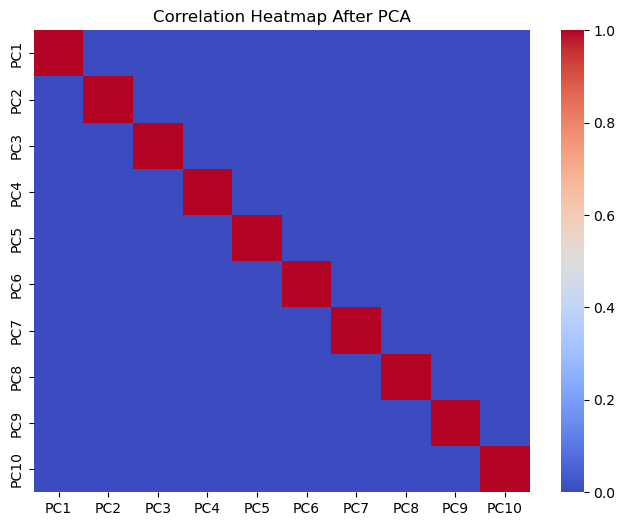

In [15]:
# Correlation Heatmap After PCA
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap After PCA')
plt.show()

The heatmap after applying PCA shows that the principal components are completely uncorrelated, meaning each captures distinct information without any overlap. This confirms that PCA has effectively simplified the data while ensuring no redundancy between the components.

# Classification with PCA

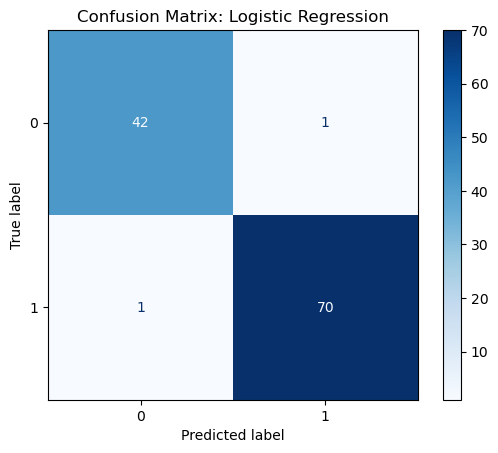

Logistic Regression Accuracy: 0.9825


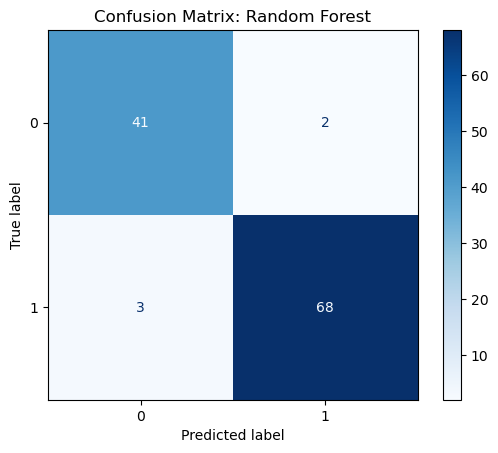

Random Forest Accuracy: 0.9561


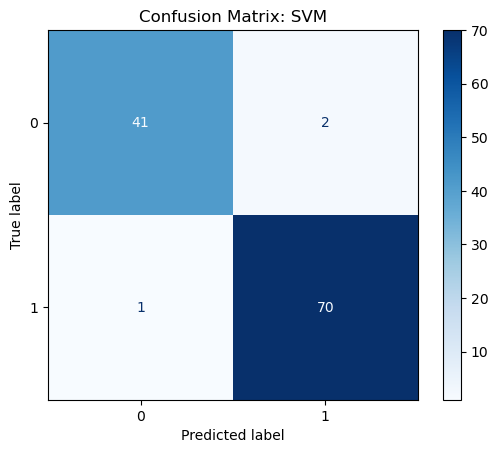

SVM Accuracy: 0.9737


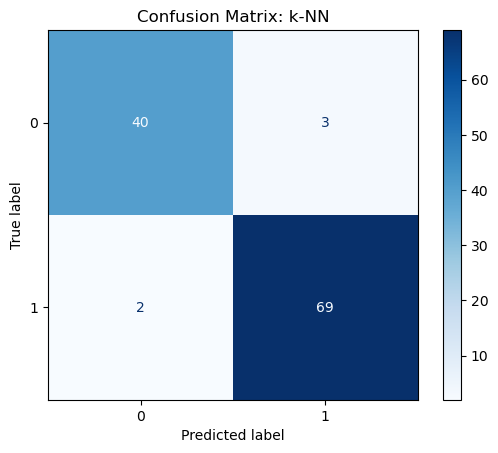

k-NN Accuracy: 0.9561


In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "k-NN": KNeighborsClassifier()
}

# Cross-validation and evaluation
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_pca, y, cv=5)
    results[name] = scores.mean()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=np.unique(y)).plot(cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.show()
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")


After applying PCA to reduce the dataset to 10 principal components, four classifiers were evaluated. Logistic Regression achieved the highest accuracy of 98.25%, followed by SVM with 97.37%, and both Random Forest and k-NN at 95.61%. Compared to the original dataset accuracy of 97.37% (without PCA), PCA maintained or improved classification performance while simplifying the dataset, demonstrating its effectiveness for dimensionality reduction without significant loss of information.

# Model Accuracy

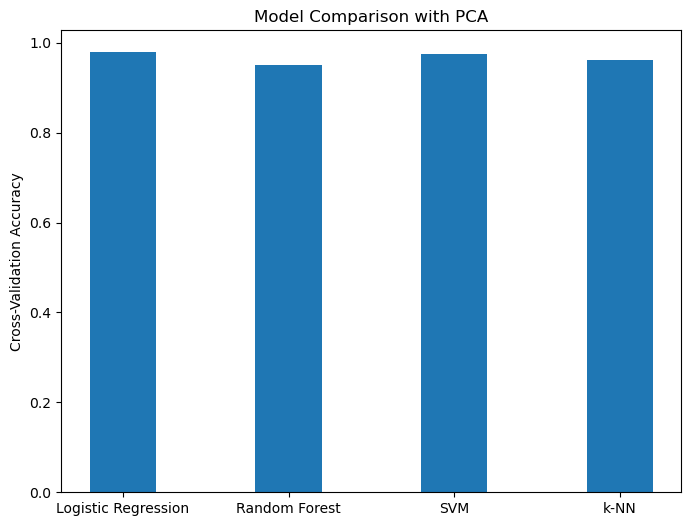

In [17]:
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(),width=0.4)
plt.ylabel('Cross-Validation Accuracy')
plt.title('Model Comparison with PCA')
plt.show()

The bar chart compares the cross-validation accuracy of four classifiers after applying PCA. Logistic Regression achieved the highest accuracy, closely followed by SVM, while Random Forest and k-NN performed slightly lower but comparably well. 

# Accuracy vs Number of Principal Components

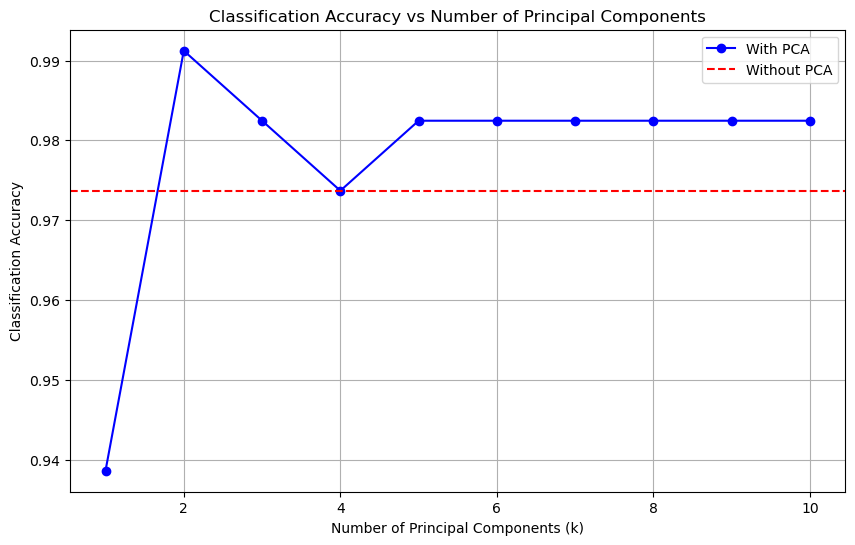

In [18]:
#Choice of k vs Classification Accuracy
n_components = optimal_components
n_components = range(1, X_train.shape[1] + 1)
accuracies_with_pca = []

logistic_model = LogisticRegression(max_iter=10000, random_state=42)
for k in n_components:
    pca = PCA(n_components=k, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    logistic_model.fit(X_train_pca, y_train)
    accuracy = accuracy_score(y_test, logistic_model.predict(X_test_pca))
    accuracies_with_pca.append(accuracy)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(n_components, accuracies_with_pca, label="With PCA", marker="o", color='blue')
plt.axhline(y=accuracy_without_pca, color="red", linestyle="--", label="Without PCA")
plt.title("Classification Accuracy vs Number of Principal Components")
plt.xlabel("Number of Principal Components (k)")
plt.ylabel("Classification Accuracy")
plt.legend()
plt.grid()
plt.show()

The plot shows how the number of principal components (k) affects classification accuracy. Accuracy rises quickly with the first few components, reaching a peak of around 99% with 2 components, before stabilizing at approximately 98% as more components are added. Without PCA, accuracy remains steady at 97.37%.<br>

How k Impacts Accuracy:<br>
Low k (1-2 components): Accuracy improves significantly as the key patterns in the data are captured by the first few components.<br>
Moderate k (3-5 components): Accuracy fluctuates slightly but remains consistent as additional variance is explained.<br>
High k (>6 components): Adding more components has little to no impact since most of the important information is already retained.<br>

This shows that using just a few principal components is enough to achieve high accuracy, while adding more components offers minimal benefits.